## Question 1 (20 points):
Write a script that:

* Computes the Euclidean distance to another **amenity** of your choosing (HINT: use `gdf['amenity'].unique()` to list the different amenities). Feel free to download OSM buildings from another place and choose a different home' location.


* Makes an interactive map showing where your ten nearest amenities are using `folium`. 

In [1]:
# Import modules
import osmnx as ox 

import numpy as np
import pandas as pd
import geopandas as gpd

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon
from shapely.geometry import LineString, MultiLineString

In [2]:
# Specify type of data
tags = {'building': True}

# Download building geometries from OSM
gdf = ox.geometries_from_place('Eugene, Oregon, USA', tags)

C:\Users\theoh\anaconda3\envs\lab3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\theoh\anaconda3\envs\lab3\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [3]:
gdf['amenity'].unique()

array([nan, 'restaurant', 'fuel', 'fire_station', 'cafe',
       'place_of_worship', 'fast_food', 'library', 'theatre', 'shelter',
       'school', 'bank', 'studio', 'dentist', 'social_facility',
       'training', 'pub', 'college', 'cinema', 'conference_centre',
       'community_centre', 'police', 'parking', 'doctors', 'post_office',
       'clinic', 'bus_station', 'prison', 'courthouse', 'veterinary',
       'music_school', 'bar', 'nightclub', 'car_wash', 'animal_shelter',
       'toilets', 'biergarten', 'childcare', 'recycling', 'marketplace',
       'bicycle_parking', 'arts_centre', 'events_venue', 'social_centre',
       'ice_cream'], dtype=object)

In [4]:
# Filter restaurants
restaurants = gdf[gdf['amenity'] == 'restaurant'].reset_index()
restaurants

,element_type,osmid,addr:state,building,ele,gnis:county_id,gnis:created,gnis:feature_id,name,operator,...,house:soliciting,soliciting,covered,facebook,opening_hours:url,yelp,surface,ways,type,contact:website
0,node,8774901928,OR,yes,NaN,NaN,NaN,NaN,Scribles Bistro & Deli,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,way,122889085,OR,yes,NaN,NaN,NaN,NaN,Cornbread Cafe,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,way,122928477,NaN,yes,NaN,NaN,NaN,NaN,Shari's,american,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,way,216914756,NaN,yes,NaN,NaN,NaN,NaN,The Kozy Kitchen,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,way,221398413,NaN,yes,NaN,NaN,NaN,NaN,Olive Garden,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,way,875672917,NaN,yes,NaN,NaN,NaN,NaN,Teng Hua Restaurant,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,way,880839409,NaN,yes,NaN,NaN,NaN,NaN,Papa's Pizza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,way,881513126,NaN,yes,NaN,NaN,NaN,NaN,Mucho Gusto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,way,912603267,NaN,yes,NaN,NaN,NaN,NaN,Albee's NY Gyros,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Reproject to UTM Zone 10N
gdf = gdf.to_crs('EPSG:32610')
restaurants = restaurants.to_crs('EPSG:32610')

In [6]:
# Get coordinates of The Collegian
collegian = gdf[gdf['name'] == 'The Collegian'].reset_index()

In [7]:
# Get restaurant and The Collegian centroids
restaurants['centroid'] = restaurants['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

collegian['centroid'] = collegian['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x))

In [8]:
# Compute distances
collegian_x = collegian['centroid'].x.values[0]
collegian_y = collegian['centroid'].y.values[0]
distances = np.sqrt(((collegian_x - restaurants['centroid'].x.values)**2)
                     + ((collegian_y - restaurants['centroid'].y.values)**2))

# Add to GeoDataFrame
restaurants['euclidean_distance'] = distances

In [9]:
print(restaurants.nsmallest(10, ['euclidean_distance'])[['name', 'euclidean_distance']])

                                name  euclidean_distance
12                               NaN          621.795719
14        Caspian Mediterranean Cafe          660.456795
31                      Maple Garden          668.036879
32               Sweet Basil Express          723.693931
66                  Sundance Kitchen          791.078420
55                Agate Alley Bistro          814.180852
54                   Studio One Cafe          832.271999
48                     Toshi's Ramen          835.596811
49  McMenamins East 19th Street Cafe          851.121521
8               Hong Kong Restaurant          919.716953


In [10]:
# Make a new DataFrame containing only the three most relevant columns
nearest_restaurants = restaurants.nsmallest(10, ['euclidean_distance'])[['name', 'euclidean_distance', 'centroid']]

# Set column geometry
nearest_restaurants = nearest_restaurants.set_geometry('centroid')

# Convert back to WGS84
nearest_restaurants = nearest_restaurants.to_crs('EPSG:4326')

# Import package
import folium

# Define center of map (i.e. Condon Hall) and initial zoom level
lat_lon = [44.0451, -123.0781]
m = folium.Map(location=lat_lon, zoom_start=15)

for i in range(0, nearest_restaurants.shape[0]):
    my_string = 'name: {}, distance: {}'.format(nearest_restaurants.iloc[i]['name'], nearest_restaurants.iloc[i]['euclidean_distance'])
    folium.Marker([nearest_restaurants.iloc[i]['centroid'].y, nearest_restaurants.iloc[i]['centroid'].x],
                 popup=my_string).add_to(m)

# Display map
m

### Computing network distances

Euclidean distances often underestimate the distance between two objects, especially when there are obstacles between the two. So we will now compute some more realistic distances to cafes around Condon Hall. First we will need to import the [<code>networkx</code>](https://networkx.org/) package which will allow us conduct a network analysis. 

## Question 2 (20 points): 

Adapt the code above to compute the network distance between two points (either in Eugene or in a city of your choice) and show your results using an interactive map. Write a few sentences about what your map shows.

In [11]:
# Import module
import networkx as nx

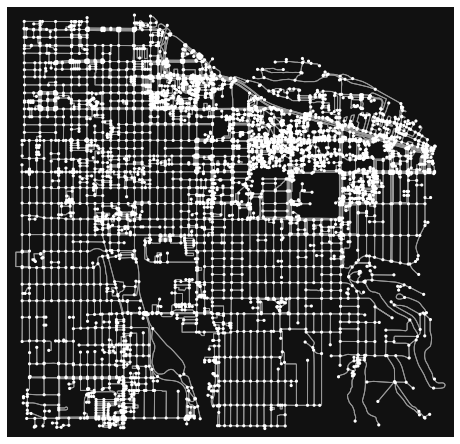

In [12]:
# Define coordinates of The Collegian
lat_lon = (44.039846, -123.080585)

# Import walkable street network data around The Collegian
g = ox.graph_from_point(lat_lon, dist=1600, network_type='walk')

# Plot map
fig, ax = ox.plot_graph(g, node_size=10)

In [13]:
# Convert to graph
graph_proj = ox.project_graph(g)

# Get edges and nodes separately
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [14]:
# Check projection is UTM Zone 10N
print("Coordinate system:", edges_proj.crs)

# Convert the restaurant dataset back to UTM Zone 10N
nearest_restaurants = nearest_restaurants.to_crs('EPSG:32610')

Coordinate system: +proj=utm +zone=10 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [15]:
# Print list of restaurants to see which desired name is at which index
nearest_restaurants

,name,euclidean_distance,centroid
12,NaN,621.795719,POINT (493676.761 4876907.601)
14,Caspian Mediterranean Cafe,660.456795,POINT (493642.902 4876953.645)
31,Maple Garden,668.036879,POINT (493593.116 4876967.430)
32,Sweet Basil Express,723.693931,POINT (493594.877 4877023.131)
66,Sundance Kitchen,791.078420,POINT (493534.762 4875510.701)
55,Agate Alley Bistro,814.180852,POINT (494347.979 4876232.668)
54,Studio One Cafe,832.271999,POINT (494365.447 4876224.861)
48,Toshi's Ramen,835.596811,POINT (492779.034 4876654.068)
49,McMenamins East 19th Street Cafe,851.121521,POINT (494385.564 4876239.331)
8,Hong Kong Restaurant,919.716953,POINT (492617.971 4876343.601)


In [16]:
# Get x and y coordinates of Condon Hall
orig_xy = (collegian['centroid'].y.values[0], collegian['centroid'].x.values[0])

# Get x and y coordinates of one of Toshi's Ramen (the seventh index)
target_xy = (nearest_restaurants['centroid'].y.values[7], nearest_restaurants['centroid'].x.values[7])

In [17]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node = ox.distance.nearest_nodes(G=graph_proj, X=orig_xy[1], Y=orig_xy[0], return_dist=False)

# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1], Y=target_xy[0], return_dist=False)

In [18]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

In [19]:
# Plot the shortest path using folium
m = ox.plot_route_folium(g, route, weight=5)
m

The above map shows the shortest route from **The Collegian** (bottom right) to **Toshi's Ramen** (upper left) in Eugene, OR. 

### Compute network distances between The Collegian and restaurants

In [20]:
# Get x and y coordinates of all ten of the nearest restaurants
target_xy = (nearest_restaurants['centroid'].y.values, nearest_restaurants['centroid'].x.values)

In [21]:
routes = []
distances = []
for i in range(len(target_xy[0])):
    
    # Find the node in the graph that is closest to the target point (here, we want to get the node id)
    target_node = ox.distance.nearest_nodes(graph_proj, X=target_xy[1][i], Y=target_xy[0][i], return_dist=False)
    
    # Calculate the shortest path
    route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')
    
    # Append route to list
    routes.append(route)
    
    # Get the nodes along the shortest path
    route_nodes = nodes_proj.loc[route]
    
    # Create a geometry for the shortest path
    route_line = LineString(list(route_nodes['geometry'].values))

    # Create a GeoDataFrame
    route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

    # Print length of route
    print('Walking distance to %s = %.1f km' % (nearest_restaurants['name'].iloc[i], route_geom['geometry'].length / 1000))
    
    # Append distances to list
    distances.append(route_geom['geometry'].length[0])

Walking distance to nan = 0.8 km
Walking distance to Caspian Mediterranean Cafe = 0.8 km
Walking distance to Maple Garden = 0.7 km
Walking distance to Sweet Basil Express = 0.8 km
Walking distance to Sundance Kitchen = 0.9 km
Walking distance to Agate Alley Bistro = 0.9 km
Walking distance to Studio One Cafe = 1.0 km
Walking distance to Toshi's Ramen = 1.0 km
Walking distance to McMenamins East 19th Street Cafe = 1.0 km
Walking distance to Hong Kong Restaurant = 0.9 km


In [22]:
nearest_restaurants['network_distance'] = distances
nearest_restaurants

,name,euclidean_distance,centroid,network_distance
12,NaN,621.795719,POINT (493676.761 4876907.601),755.791684
14,Caspian Mediterranean Cafe,660.456795,POINT (493642.902 4876953.645),816.562847
31,Maple Garden,668.036879,POINT (493593.116 4876967.430),737.681065
32,Sweet Basil Express,723.693931,POINT (493594.877 4877023.131),761.964456
66,Sundance Kitchen,791.078420,POINT (493534.762 4875510.701),872.253689
55,Agate Alley Bistro,814.180852,POINT (494347.979 4876232.668),891.510994
54,Studio One Cafe,832.271999,POINT (494365.447 4876224.861),1038.154627
48,Toshi's Ramen,835.596811,POINT (492779.034 4876654.068),1033.834211
49,McMenamins East 19th Street Cafe,851.121521,POINT (494385.564 4876239.331),1038.154627
8,Hong Kong Restaurant,919.716953,POINT (492617.971 4876343.601),902.542253


## Question 3 (10 points): 


* a) Calculate the average difference between the Euclidean and network distances for you amenities 


* b) Describe some situations where it would not be advisable to use Euclidean distances?

**Part a**

In [23]:
# Retrieve all euclidean and network distances
euc_dist = nearest_restaurants['euclidean_distance'].tolist()
net_dist = nearest_restaurants['network_distance'].tolist()

In [24]:
# Loop over each distance to calculate average difference
differences = []
for i in range(len(euc_dist)):
    differences.append((abs(euc_dist[i] - net_dist[i])))

In [25]:
# Find average of all distances
avg = sum(differences)/len(differences)
avg

116.48499750201714

**Part b**

For the most part, any type of distance analysis that requires the use of a road network should avoid using euclidean distance. 

This is because many obstructions can heavily influence the required path between two nodes and therefore alter the distance that is travelled between nodes. 

For example, in a situation where someone wants to know the distance to the closest library, this would require the use of a road network to reach the destination. If that this person lived on the other side of a major highway as the closest library and therefore had to take a detour to the nearest overpass for that highway before reaching the library, this would heavily influence the distance travelled when compared to the euclidean straight line distance.